# LFD: Homework 1

This is the first homework in the [learning from data](https://courses.edx.org/courses/course-v1:CaltechX+CS1156x+3T2017) course. Most of the homework has been done by hand, so this only encompasses the perceptron experiment.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

## Setup

The first part is the experiment setup. The definition extracted from the exercise is as follows. The input domain is set to $\mathcal{X} = [-1, 1]^{2}$ with $d = 2$ (for easier visualization). For each experiment pass, we create a random function $f: \mathcal{X} \mapsto \{-1, 1\}$ by randomly selecting two points in $\mathcal{X}$ and using the line through them as decision boundary for the labels in $\mathcal{Y}$. Then, we generate labeled test data $(\mathbf{x}_i, y_i)$ of length $N$ and return it together with a `ufunc` implementation for $f$.

In [2]:
def generate_data(N = 10):
    ''' Generates linear target function f and labeled, linearly separable test data generated by f.'''
    
    # choose two random points p1, p2 and compute a vector p orthogonal to their difference
    p1, p2 = (np.random.rand(2,2) - 0.5) * 2.
    p = np.array([1, -(p2 - p1)[0]/(p2 - p1)[1]])
    p /= np.linalg.norm(p)
    
    f = lambda x: np.sign((x - p1) @ p).reshape(-1,1)
    f.db = lambda x: (p2[1] - p1[1])/(p2[0] - p1[0]) * (x - p1[0]) + p1[1]
    
    # generate data points and apply classifier to label them
    X = (np.random.rand(N, 2) - 0.5) * 2
    Y = f(X)
    
    return X,Y,f

Now we need some simple way to plot this data to visually assess the decision boundary.

In [8]:
def plot_data(X, Y, db = None):
    ''' Plots two dimensional, linearly separable data from the interval [-1, 1] and the optional decision boundary db.'''
    
    plt.clf()
    pos_examples = X[(Y == 1).reshape(-1)]
    neg_examples = X[(Y == -1).reshape(-1)]
    neu_examples = X[(Y == 0).reshape(-1)]
    
    # plot the three groups of examples
    plt.scatter(pos_examples[:,0], pos_examples[:,1], color='steelblue', marker='+')
    plt.scatter(neg_examples[:,0], neg_examples[:,1], color='red', marker='o')
    plt.scatter(neu_examples[:,0], neu_examples[:,1], color='black', marker='o')
    
    # plot the decision boundary if provided
    if db is not None:
        x = np.arange(-1., 1., 0.01)
        plt.plot(x, db(x), c='red', ls='dashed', lw=1.)
    
    plt.grid(alpha=.3)
    plt.gca().set_xlim(-1, 1)
    plt.gca().set_ylim(-1, 1)

This then allows us to generate some test data and plot what's going on:

<IPython.core.display.Javascript object>


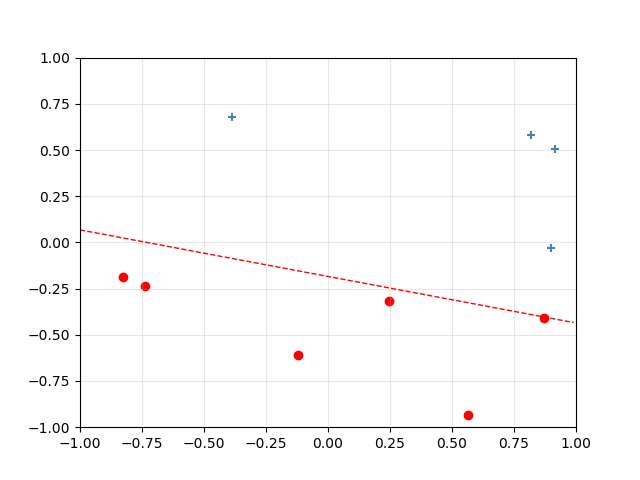

In [7]:
X, Y, f = generate_data(10)
plot_data(X, Y, f.db)

## Perceptron Learning

Now we implement the simplified perceptron learning algorithm. A perceptron is basically a linear model with the signum function used for classification, which is learned through the perceptron learning algorithm `pla`.

In [5]:
def pla(X, Y):
    N, d = X.shape
    X = np.concatenate((np.ones((N,1)), X), axis=1)
    
    # perceptron hypothesis function generator
    def H(w):
        h = lambda x: np.sign(x @ w).reshape(-1,1)
        h.w = w
        return h
    
    # perceptron learning algorithm
    h = H(np.zeros(d+1))
    X_prime, Y_prime = X.copy(), Y.copy()
    iterations = 0
    
    while X_prime.shape[0] > 0:
        # randomly select misclassified point
        i = np.random.randint(X_prime.shape[0])
        x_i, y_i = X_prime[i], Y_prime[i]
        
        # update hypothesis
        h = H(h.w + y_i * x_i.T)
        
        # identify misclassified points
        idx = (h(X) != Y).reshape(-1)
        X_prime, Y_prime = X[idx], Y[idx]
        iterations += 1
        
        # divergence circuit breaker
        if iterations >= 100000:
            raise StopIteration('maximum of 100000 iterations reached')

    return h, iterations

## Experiments

Now we perform the required experiments in order to identify the

 * number of iterations that `pla` needs on average to converge
 * probability that $f$ and $g$ will disagree on a random point (out of sample)
 
Let's begin with the number of iterations and error rate for $N = 10$. The number of experiments required by the lecture is given as $1000$.

In [32]:
quantities = []

for i in range(1000):
    
    X, Y, f = generate_data(10)
    g, iterations = pla(X,Y)
    
    X_prime = np.concatenate((np.ones((1000,1)), (np.random.rand(1000, 2) - 0.5) * 2), axis=1)
    error_rate = np.sum(f(X_prime[:,1:]) != g(X_prime)) / 1000.
    
    if i%100 == 0:
        print('experiment {}: iterations={} / error_rate={:.3f}'.format(i, iterations, error_rate))
    
    quantities.append((iterations, error_rate))

experiment 0: iterations=18 / error_rate=0.022
experiment 100: iterations=1 / error_rate=0.146
experiment 200: iterations=5 / error_rate=0.140
experiment 300: iterations=4 / error_rate=0.060
experiment 400: iterations=13 / error_rate=0.024
experiment 500: iterations=5 / error_rate=0.118
experiment 600: iterations=13 / error_rate=0.042
experiment 700: iterations=8 / error_rate=0.075
experiment 800: iterations=7 / error_rate=0.082
experiment 900: iterations=6 / error_rate=0.165


In [33]:
print('average_iterations = {:.3f} / average_error_rate = {:.3f}'.format(*np.mean(quantities, axis=0)))

average_iterations = 9.623 / average_error_rate = 0.110


Now we repeat the process with $N = 100$:

In [34]:
quantities = []

for i in range(1000):
    
    X, Y, f = generate_data(100)
    g, iterations = pla(X,Y)
    
    X_prime = np.concatenate((np.ones((1000,1)), (np.random.rand(1000, 2) - 0.5) * 2), axis=1)
    error_rate = np.sum(f(X_prime[:,1:]) != g(X_prime)) / 1000.
    
    if i%100 == 0:
        print('experiment {}: iterations={} / error_rate={:.3f}'.format(i, iterations, error_rate))
    
    quantities.append((iterations, error_rate))

experiment 0: iterations=73 / error_rate=0.012
experiment 100: iterations=118 / error_rate=0.004
experiment 200: iterations=54 / error_rate=0.018
experiment 300: iterations=145 / error_rate=0.004
experiment 400: iterations=107 / error_rate=0.012
experiment 500: iterations=43 / error_rate=0.003
experiment 600: iterations=44 / error_rate=0.031
experiment 700: iterations=349 / error_rate=0.037
experiment 800: iterations=88 / error_rate=0.002
experiment 900: iterations=50 / error_rate=0.017


In [35]:
print('average_iterations = {:.3f} / average_error_rate = {:.3f}'.format(*np.mean(quantities, axis=0)))

average_iterations = 111.908 / average_error_rate = 0.013
